# Snapshot of Dataset for future use
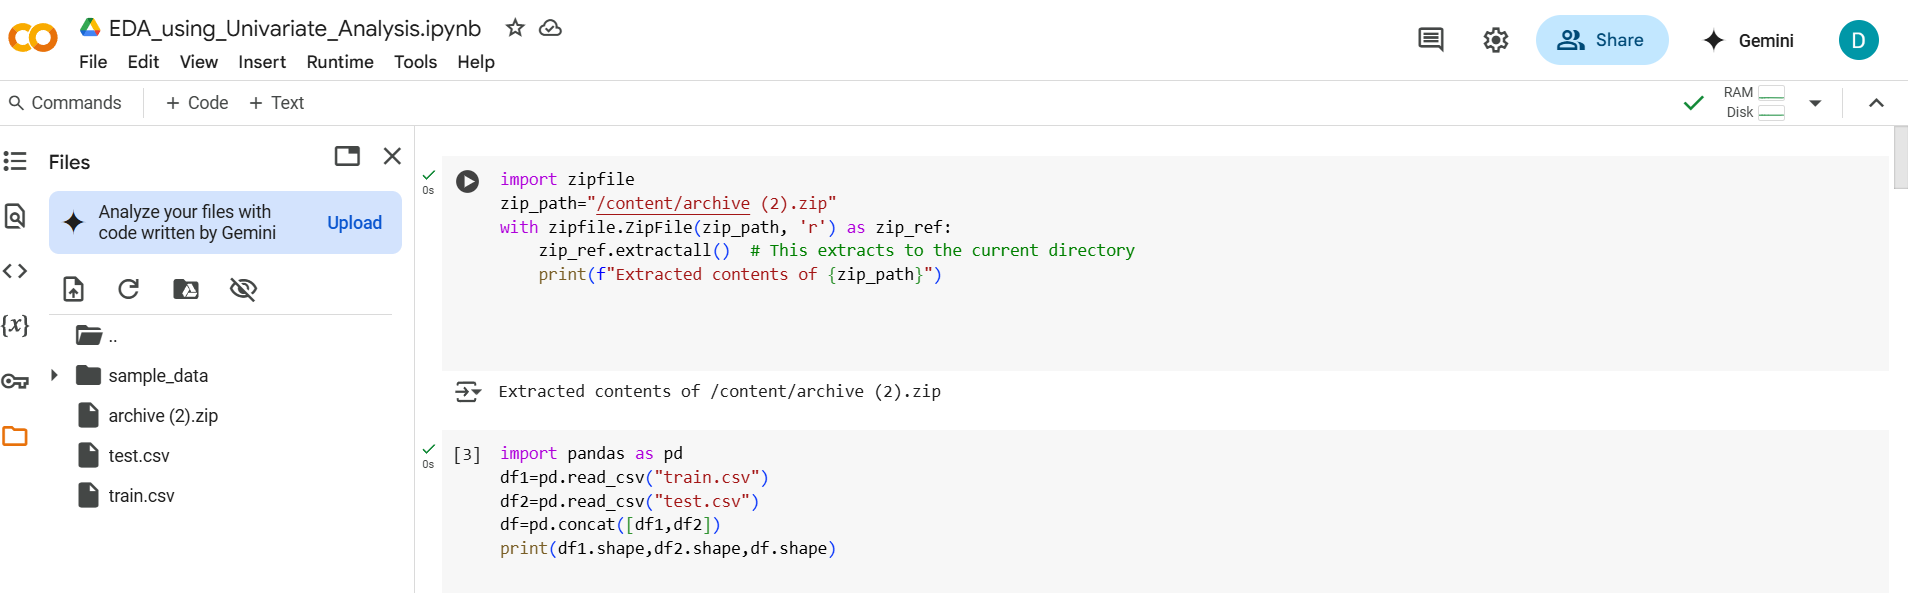

In [2]:
import zipfile
zip_path="/content/archive (2).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # This extracts to the current directory
    print(f"Extracted contents of {zip_path}")




Extracted contents of /content/archive (2).zip


In [3]:
import pandas as pd
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df=pd.concat([df1,df2])
print(df1.shape,df2.shape,df.shape)




(891, 12) (418, 11) (1309, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.corr(numeric_only=True)["Survived"]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


# 1. Categorical Data

a) Countplot

<Axes: xlabel='Survived'>

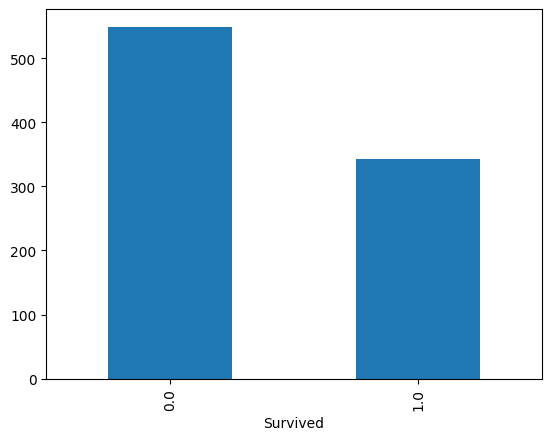

In [26]:
import seaborn as sns
#sns.countplot(df["Embarked"])
df["Survived"].value_counts().plot(kind="bar")

### b. Pie Chart

<Axes: ylabel='count'>

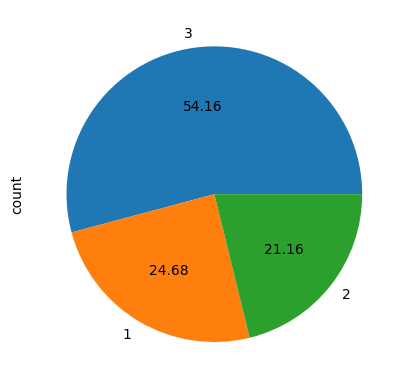

In [43]:
df['Pclass'].value_counts().plot(kind='pie',autopct="%.2f")



# 2. Numeric Data

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## a. Histogram

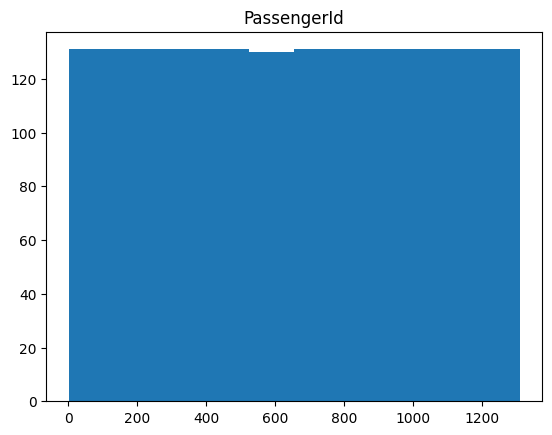

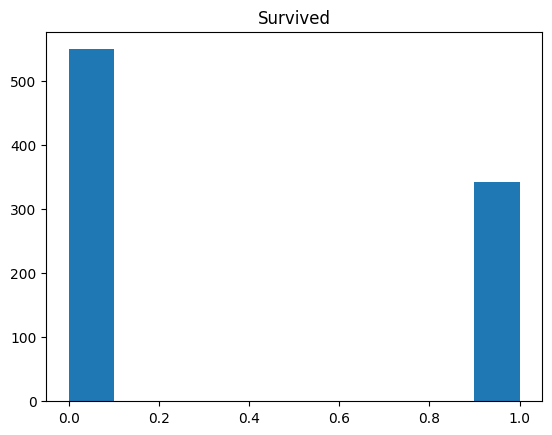

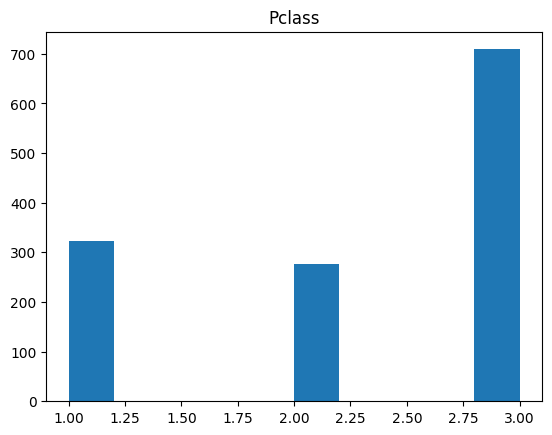

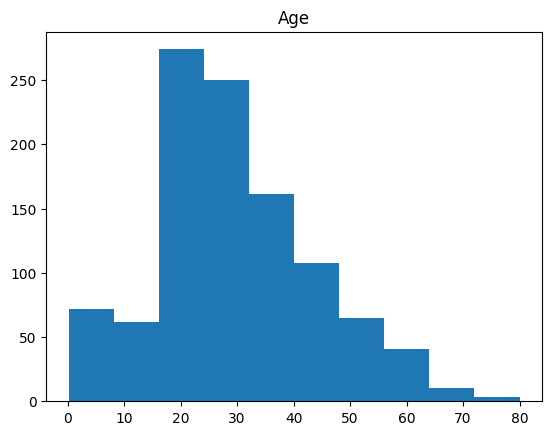

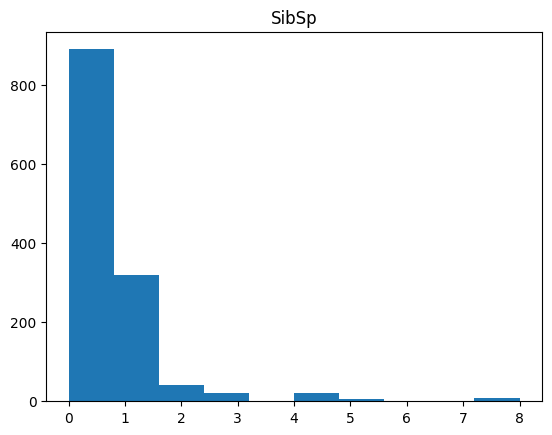

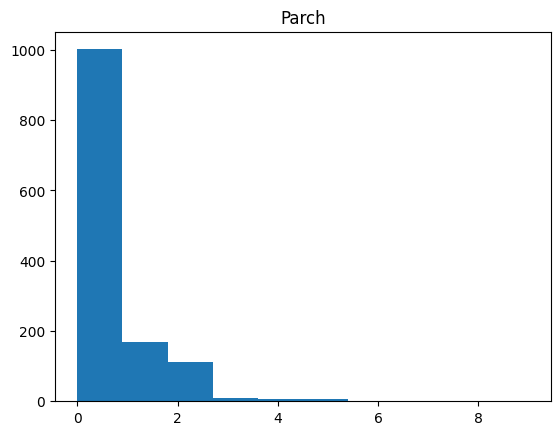

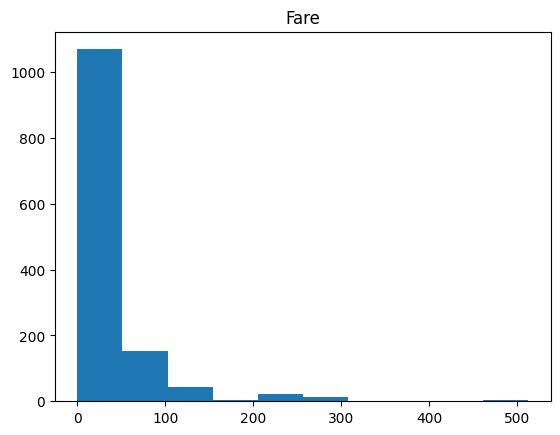

In [73]:
import matplotlib.pyplot as plt
lst=df.columns
for i in lst:
  if df[i].dtype=="int64" or df[i].dtype=="float64":
    plt.hist(df[i])
    plt.title(i)
    plt.show()




## b) Distplot

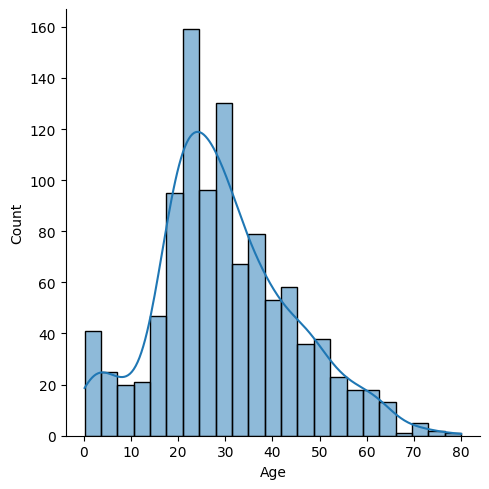

In [76]:
new_var = sns.displot(df["Age"],kde=True)
new_var

## c. Boxplot

<Axes: ylabel='Age'>

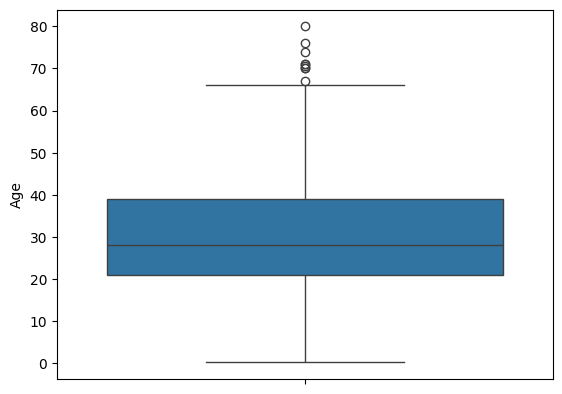

In [78]:
sns.boxplot(df["Age"]) #Here are few outliers

In [83]:
df['Age'].min()

0.17